# Import libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read data

In [5]:
covid_df = pd.read_csv('../data/final_data.csv')
covid_df.head()

,Country,Date,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",TotalTests,Population,Continent,1 Caseevery X ppl
0,Afghanistan,2023-03-02,209359,19,7896.0,0.0,191166.0,10,10297.0,45,1201475.0,40754388,Asia,195
1,Afghanistan,2023-03-03,209362,3,7896.0,0.0,191170.0,4,10296.0,45,1201744.0,40754388,Asia,195
2,Afghanistan,2023-03-04,209370,4,7896.0,0.0,191181.0,7,10293.0,45,1202018.0,40754388,Asia,195
3,Afghanistan,2023-03-05,209390,20,7896.0,0.0,191212.0,31,10282.0,45,1202290.0,40754388,Asia,195
4,Afghanistan,2023-03-06,209394,24,7896.0,0.0,191233.0,52,10265.0,45,1202290.0,40754388,Asia,195


### **Question 11 : Which continent is recording the highest number of infections and deaths as of the latest day? Which country has the highest %?**
- There are many steps:
    - Get the latest day
    - Get the sum of number of cases and deaths for each continent
    - Plot the pie chart

### Step 1: Get the latest day

In [9]:
last_date = covid_df[covid_df['Date'] == '2023-03-10']
last_date

,Country,Date,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",TotalTests,Population,Continent,1 Caseevery X ppl
8,Afghanistan,2023-03-10,209484,2,7896.0,0.0,191284.0,4,10304.0,45,1204573.0,40754388,Asia,195
17,Albania,2023-03-10,334474,17,3598.0,0.0,329206.0,11,1670.0,0,1941032.0,2866374,Europe,9
26,Algeria,2023-03-10,271499,3,6881.0,0.0,182819.0,6,81799.0,0,230861.0,45350148,Africa,167
35,Angola,2023-03-10,105288,0,1933.0,0.0,103342.0,0,13.0,0,1499795.0,35027343,Africa,333
44,Argentina,2023-03-10,10044957,0,130472.0,0.0,9911664.0,0,2821.0,363,35716069.0,46010234,South America,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1385,Venezuela,2023-03-10,552188,20,5854.0,0.0,545948.0,2,386.0,31,3359014.0,29266991,South America,53
1394,Vietnam,2023-03-10,11527026,14,43186.0,0.0,10614815.0,6,869025.0,1,85826548.0,98953541,Asia,9
1403,Yemen,2023-03-10,11945,0,2159.0,0.0,9124.0,0,662.0,23,329592.0,31154867,Asia,"2,608"
1412,Zambia,2023-03-10,343135,0,4057.0,0.0,338854.0,0,224.0,0,3943335.0,19470234,Africa,57


### Step 2: Get the sum of number of cases and deaths for each continent

In [25]:
# GET SUM OF CASES FOR EACH CONTINENT
continent_cases = last_date.groupby('Continent').sum().reset_index()
continent_cases = continent_cases.sort_values(by='TotalCases', ascending=False)

### Step 3: Calculate the percentage of deaths and cases for each continent

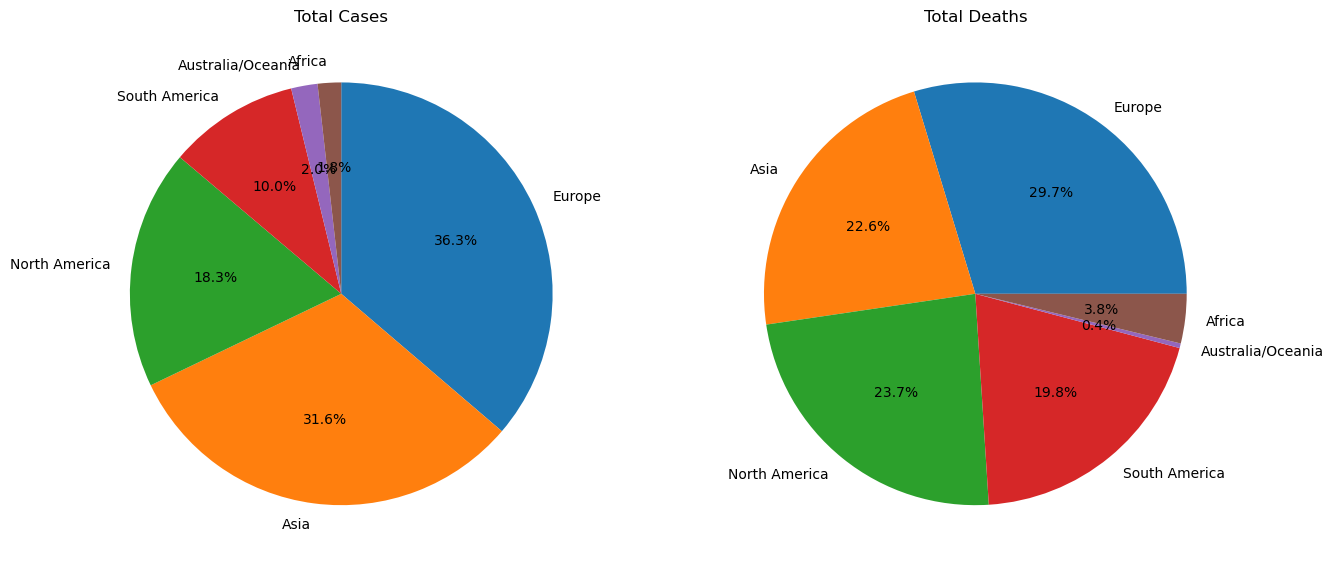

In [28]:
# how to plot 2 pie charts in one figure
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
# explode the first pie chart
# plot the first pie chart
ax[0].pie(continent_cases['TotalCases'], labels=continent_cases['Continent'], autopct='%1.1f%%', counterclock=False, startangle=90)
ax[0].set_title('Total Cases')
# plot the second pie chart
ax[1].pie(continent_cases['TotalDeaths'], labels=continent_cases['Continent'], autopct='%1.1f%%')
ax[1].set_title('Total Deaths')
plt.show()


- Comments:
    - Total cases and deaths in Europe are the highest with 36.3% and 29.7% respectively.
    - Total cases in Asia and Europe are nearly 80% in the world. Those two continents are the most affected so the total deaths in Asia and Europe are also the high. 50% of the world's total deaths are in Asia and Europe.
    - Africa has the lowest percentage of cases in the world with only 1.8%.